In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pandas_profiling
warnings.filterwarnings('ignore')
from pandas.io.stata import StataReader
from ydata_profiling import ProfileReport

In [4]:
data = pd.read_csv('/Users/lixian/workplace/transaction_scam_detection/data/prepared_scam_detection_dataset.csv')

In [5]:
data.describe()

,transaction_amount,gas_price,wallet_age,num_transactions,liquidity_removed,repeated_token_approvals,contract_complexity,tokens_sent_to_exchanges,withdrawal_to_deposit_ratio,burst_pattern,...,erc20_to_erc721_ratio,failed_transaction_count,inactivity_before_scam,day_night_activity_split,nft_transfer_count,suspicious_contract_calls,mint_to_transfer_ratio,dex_interaction_ratio,social_media_mentions,is_scam
count,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,...,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,10000.00000
mean,3.552714e-18,7.389644e-17,-6.110668e-17,1.421085e-17,4.050094e-17,-3.907985e-17,-3.907985e-17,-1.527667e-16,-1.989520e-17,1.421085e-17,...,-1.595168e-16,-4.121148e-17,-1.278977e-16,-1.301181e-16,5.240253e-18,3.144152e-17,-1.694644e-16,2.486900e-16,7.105427e-19,0.00000
std,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,...,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.00005
min,-8.682260e-01,-1.011156e+00,-8.264010e-01,-9.413500e-01,-1.242486e+00,-1.064525e+00,-1.387187e+00,-1.237707e+00,-9.922745e-01,-9.413500e-01,...,-1.888446e+00,-8.430125e-01,-1.468721e+00,-1.092316e+00,-7.218686e-01,-8.814786e-01,-1.409485e+00,-1.433305e+00,-7.890543e-01,-1.00000
25%,-7.897558e-01,-8.555925e-01,-7.825435e-01,-7.807446e-01,-9.466551e-01,-1.064525e+00,-9.703735e-01,-9.834087e-01,-8.362871e-01,-7.807446e-01,...,-8.535239e-01,-7.796171e-01,-7.743192e-01,-7.359488e-01,-7.218686e-01,-7.234990e-01,-7.971567e-01,-7.910021e-01,-7.735588e-01,-1.00000
50%,-7.120895e-01,-5.452971e-01,-7.355534e-01,-6.522603e-01,-2.194903e-01,-4.560510e-01,-3.634411e-04,-6.235022e-02,-6.009538e-01,-6.522603e-01,...,4.745657e-03,-6.528264e-01,-2.106154e-01,-4.999591e-01,-7.218686e-01,-5.655194e-01,-1.764205e-01,-1.663992e-01,-7.580633e-01,0.00000
75%,8.081654e-01,8.622517e-01,7.720478e-01,7.931883e-01,9.396607e-01,7.608963e-01,9.707036e-01,9.808326e-01,8.484423e-01,7.931883e-01,...,8.769163e-01,8.052669e-01,6.590456e-01,6.913197e-01,9.994618e-01,6.983171e-01,5.100394e-01,4.733984e-01,7.759903e-01,1.00000
max,2.253863e+00,2.126982e+00,2.303144e+00,2.238637e+00,1.680729e+00,1.977843e+00,1.386878e+00,1.373992e+00,2.133075e+00,2.238637e+00,...,1.719748e+00,2.326755e+00,2.305551e+00,2.453084e+00,2.147015e+00,2.278113e+00,2.409131e+00,2.381605e+00,2.310044e+00,1.00000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   transaction_amount                 10000 non-null  float64
 1   gas_price                          10000 non-null  float64
 2   wallet_age                         10000 non-null  float64
 3   num_transactions                   10000 non-null  float64
 4   liquidity_removed                  10000 non-null  float64
 5   repeated_token_approvals           10000 non-null  float64
 6   contract_complexity                10000 non-null  float64
 7   tokens_sent_to_exchanges           10000 non-null  float64
 8   withdrawal_to_deposit_ratio        10000 non-null  float64
 9   burst_pattern                      10000 non-null  float64
 10  unique_wallet_interactions         10000 non-null  float64
 11  largest_transaction_amount         10000 non-null  floa

In [7]:
# 连续型变量
serial_feature = []
# 离散型变量
discrete_feature = []
for fea in data:
    temp = data[fea].nunique()# 返回的是唯一值的个数  
    if temp <= 10:
        discrete_feature.append(fea)
    else:
        serial_feature.append(fea)


In [10]:
serial_feature

['transaction_amount',
 'gas_price',
 'wallet_age',
 'num_transactions',
 'liquidity_removed',
 'contract_complexity',
 'tokens_sent_to_exchanges',
 'withdrawal_to_deposit_ratio',
 'burst_pattern',
 'unique_wallet_interactions',
 'largest_transaction_amount',
 'failed_transaction_ratio',
 'wallet_reputation_score',
 'percentage_funds_transferred',
 'token_holdings',
 'deployer_reputation',
 'multiple_token_approvals',
 'time_between_transactions',
 'average_microtransaction_size',
 'total_microtransaction_volume',
 'percentage_small_transactions',
 'average_transaction_interval',
 'max_consecutive_microtransactions',
 'cumulative_transaction_volume',
 'transaction_variability',
 'abnormal_gas_fee_ratio',
 'erc20_to_erc721_ratio',
 'failed_transaction_count',
 'inactivity_before_scam',
 'day_night_activity_split',
 'suspicious_contract_calls',
 'mint_to_transfer_ratio',
 'dex_interaction_ratio',
 'social_media_mentions',
 'wallet_id']

In [12]:
print(len(serial_feature))

35


In [15]:
# 计算偏态系数（Skewness）和峰度（Kurtosis）
# Filter out non-numeric columns (wallet_id is string type)
numeric_features = [feat for feat in serial_feature if feat != 'wallet_id']
stats_summary = data[numeric_features].describe().T
stats_summary["skewness"] = data[numeric_features].skew()
stats_summary["kurtosis"] = data[numeric_features].kurt()
stats_summary[['skewness','kurtosis']].sort_values(by="skewness", ascending=False)

,skewness,kurtosis
day_night_activity_split,1.044151,-0.311021
multiple_token_approvals,1.023366,-0.356584
suspicious_contract_calls,0.978773,-0.502922
token_holdings,0.969868,-0.518142
failed_transaction_count,0.965248,-0.557809
cumulative_transaction_volume,0.949251,-0.583889
social_media_mentions,0.923879,-0.640472
wallet_age,0.915148,-0.648866
largest_transaction_amount,0.888082,-0.698338
transaction_amount,0.873637,-0.741932


In [16]:
# 筛选出偏态系数大于等于3的变量
high_skew = stats_summary[stats_summary["skewness"] >= 3]
high_skew_list = high_skew.index.tolist()
print(high_skew_list)

[]


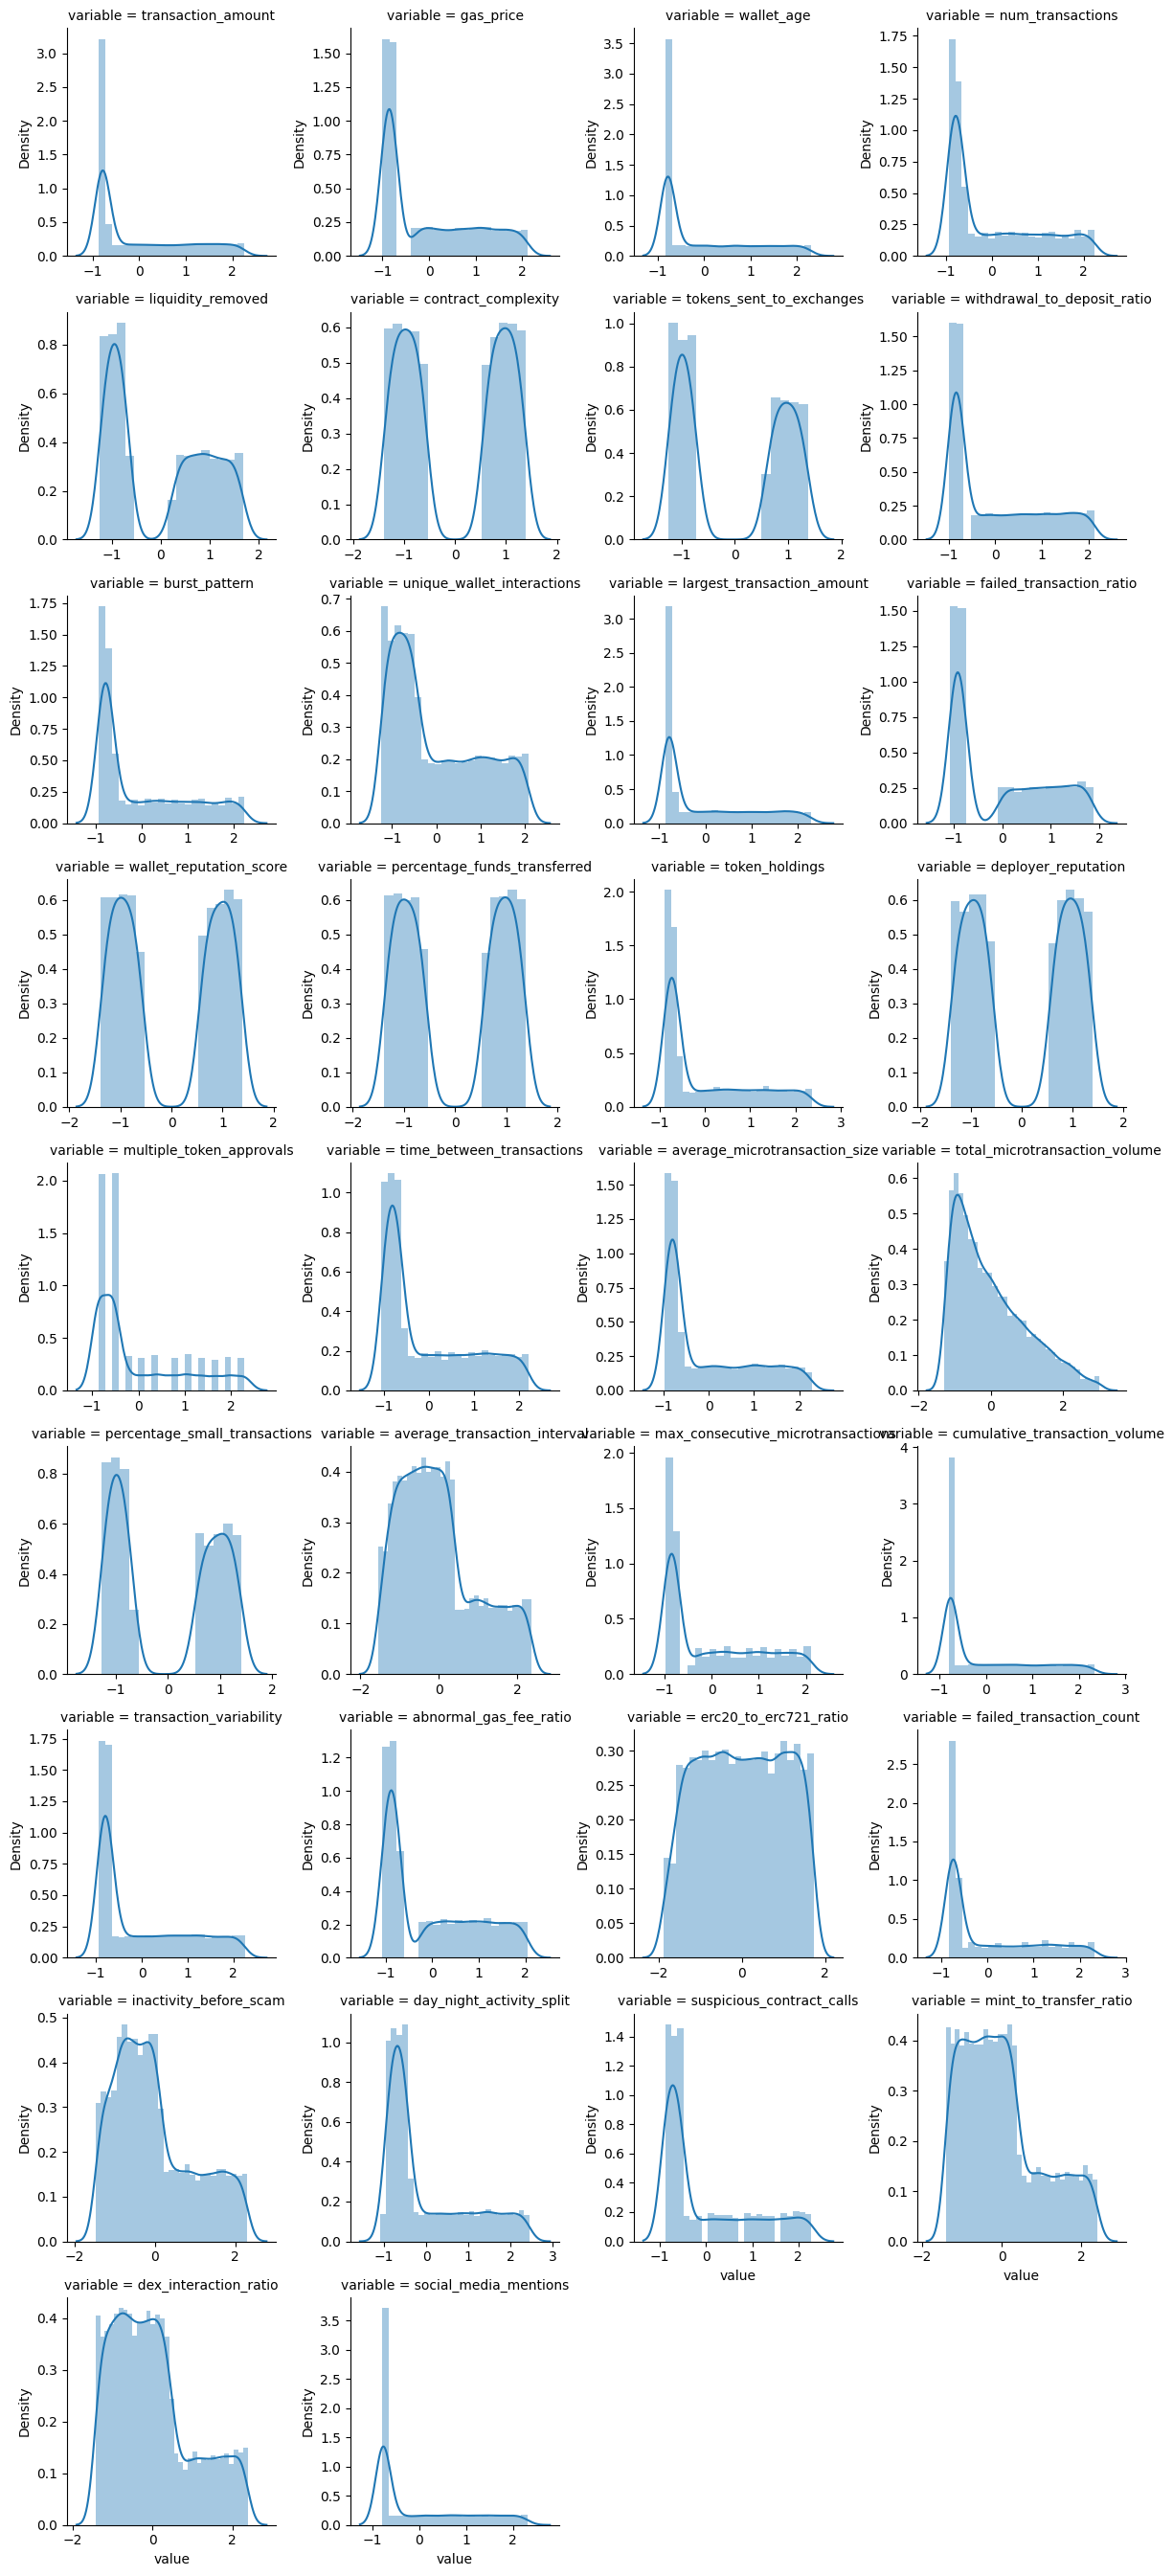

In [19]:
#每个数值特征得分布可视化
f = pd.melt(data, value_vars=numeric_features)
g = sns.FacetGrid(f, col="variable",  col_wrap=4, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

In [20]:
discrete_feature

['repeated_token_approvals', 'nft_transfer_count', 'is_scam']

In [21]:
for f in discrete_feature:
    print(f, '类型数：', data[f].nunique())

repeated_token_approvals 类型数： 6
nft_transfer_count 类型数： 6
is_scam 类型数： 2


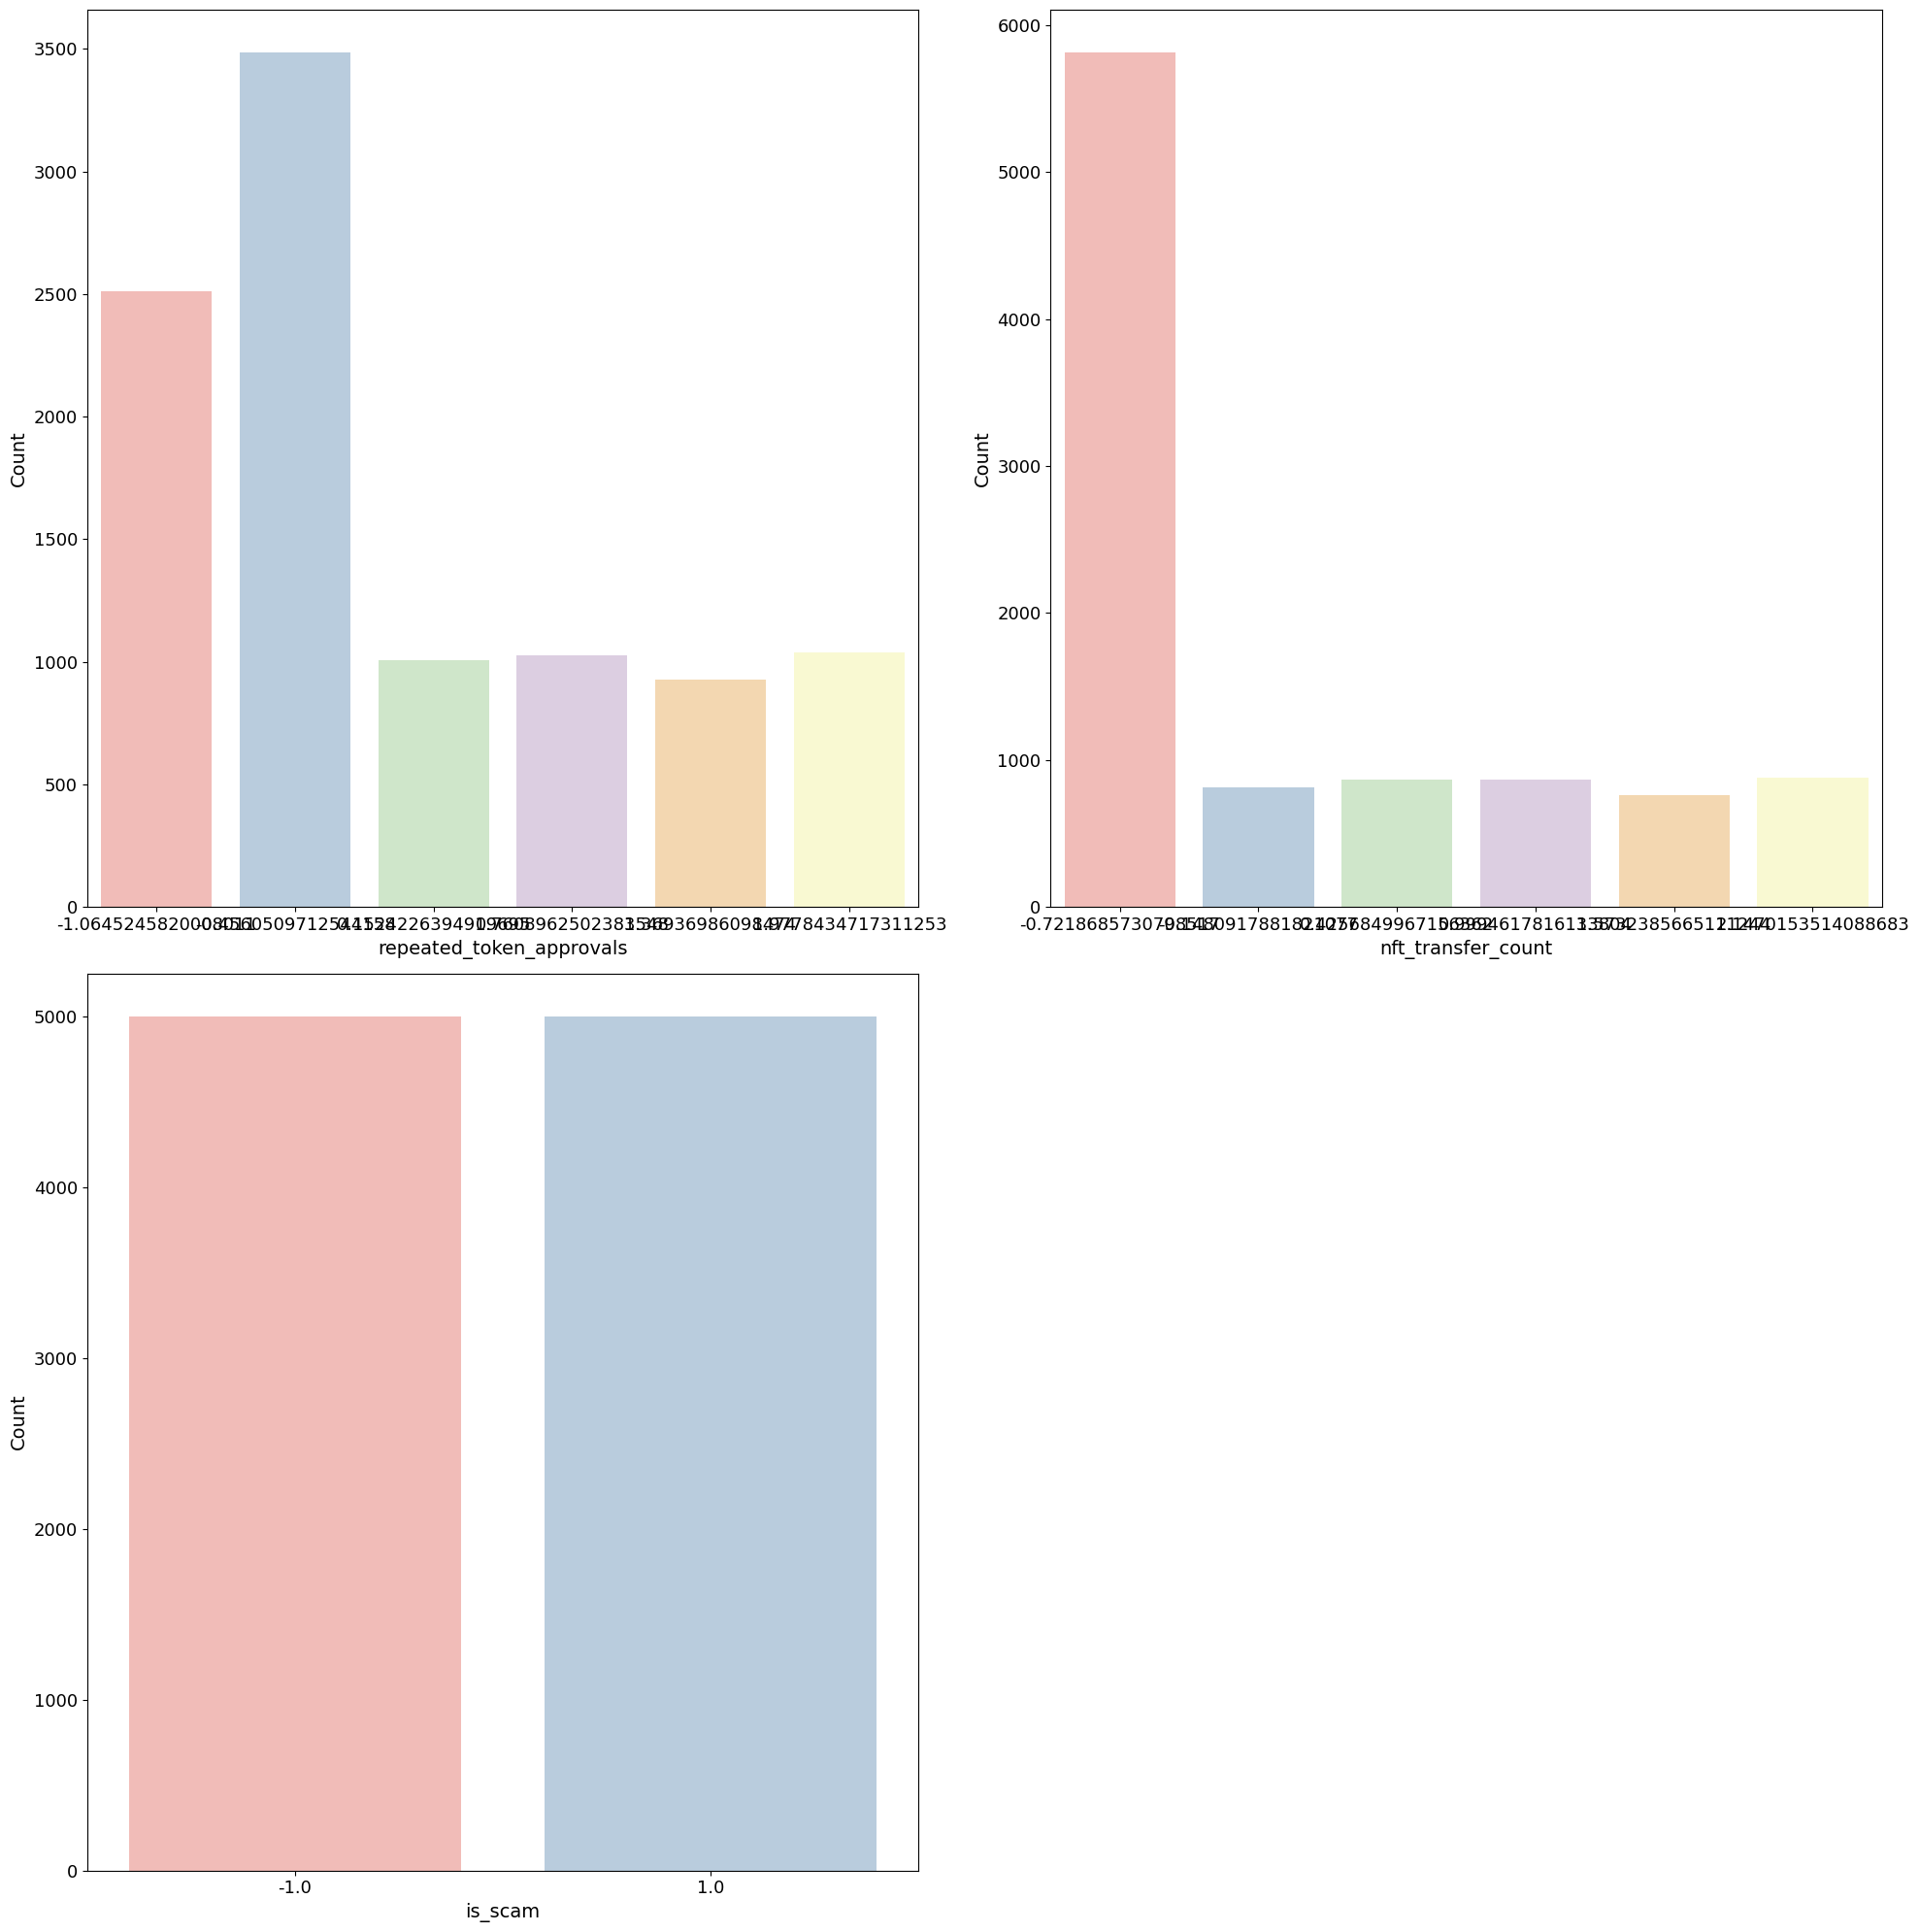

In [ ]:
df_ = data[discrete_feature]
# 1. 计算变量个数和设置网格布局
num_plots = len(df_.columns) 
num_cols = 2              
num_rows = (num_plots + num_cols - 1) // num_cols  # 自动计算行数（20个变量则为4行）

# 2. 创建画布和子图，适当放大图表尺寸保证清晰度
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 20))
axes = axes.flatten()  # 将二维数组展平，便于迭代

# 3. 循环绘制每个变量的计数图
for i, item in enumerate(df_.columns):
    ax = axes[i]
    sns.countplot(x=item, data=df_, palette="Pastel1", ax=ax)
    ax.set_xlabel(item, fontsize=14)   # 设置x轴标签
    ax.set_ylabel('Count', fontsize=14)  # 设置y轴标签
    ax.tick_params(labelsize=13)         # 设置坐标轴刻度字体大小

# 4. 隐藏多余的子图
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# 5. 调整整体布局并显示图表
plt.tight_layout()
plt.show()

## 缺失值情况

In [26]:
print(f'There are {data.isnull().any().sum()} columns in train dataset with missing values.')

There are 0 columns in train dataset with missing values.
